In [1]:
from utils import collect, add_info
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from math import pi
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import numpy as np

sns.set_context("talk")
sns.set_style("ticks")


In [4]:
collect(Path("/work/dlclarge2/agnihotr-shashank-pruneshift/hyperparameter_analysis/goodconfig/")).sort_values(by=["Path"])

,Amda,Augmix,Batch Size,DeepAugment,Epochs,Hydra Amda,Hydra Loss,ImageNet100 Error,ImageNet100-C Error,ImageNet100-R Error,...,Path,Prune Ratio,Scaling,SupCon Loss,Supcon Amda,Teacher,Temperature,WeightDecay,kd_T,kd_mixture
90,True,True,NaN,True,30,NaN,NaN,12.099999,29.986662,53.375581,...,/work/dlclarge2/agnihotr-shashank-pruneshift/h...,NaN,1,NaN,NaN,AMDA ResNet50,NaN,0.00009,2,0.7
90,True,True,NaN,True,30,NaN,NaN,14.780003,34.562939,55.787635,...,/work/dlclarge2/agnihotr-shashank-pruneshift/h...,NaN,1,NaN,NaN,AMDA ResNet50,NaN,0.00009,2,0.7
90,True,True,NaN,True,30,NaN,NaN,23.979998,48.582935,62.538800,...,/work/dlclarge2/agnihotr-shashank-pruneshift/h...,NaN,1,NaN,NaN,AMDA ResNet50,NaN,0.00009,2,0.7
90,True,True,NaN,True,30,NaN,NaN,36.739999,62.090397,72.749612,...,/work/dlclarge2/agnihotr-shashank-pruneshift/h...,NaN,1,NaN,NaN,AMDA ResNet50,NaN,0.00009,2,0.7
90,True,True,256.0,True,30,True,KnowledgeDistill,10.799998,27.344263,52.004656,...,/work/dlclarge2/agnihotr-shashank-pruneshift/h...,10.0,1,KnowledgeDistill,True,AMDA ResNet50,None,0.00009,2,0.7
90,True,True,256.0,True,30,True,KnowledgeDistill,12.419999,30.112535,54.125711,...,/work/dlclarge2/agnihotr-shashank-pruneshift/h...,20.0,1,KnowledgeDistill,True,AMDA ResNet50,None,0.00009,2,0.7
90,True,True,256.0,True,30,True,KnowledgeDistill,15.719998,34.582132,57.468960,...,/work/dlclarge2/agnihotr-shashank-pruneshift/h...,40.0,1,KnowledgeDistill,True,AMDA ResNet50,None,0.00009,2,0.7
90,True,True,256.0,True,30,True,KnowledgeDistill,24.440002,44.897866,64.834455,...,/work/dlclarge2/agnihotr-shashank-pruneshift/h...,80.0,1,KnowledgeDistill,True,AMDA ResNet50,None,0.00009,2,0.7


In [6]:
df=collect(Path("/work/dlclarge2/agnihotr-shashank-pruneshift/"))

AttributeError: 'NoneType' object has no attribute '_target_'

In [5]:
df.query("Network=='resnet50'")

NameError: name 'df' is not defined

In [7]:
dd=collect(Path("/work/dlclarge2/agnihotr-shashank-pruneshift/runs_supcon/cifar100_resnet50"))
verifying=dd.query("`SupCon Loss`=='SupCon'")
std=verifying["Cifar100 Error"].to_numpy()
corr=verifying["Cifar100-C Error"].to_numpy()

In [17]:
ver=dd.query("'std' not in Path")
verifying

,Amda,Augmix,Batch Size,Cifar100 Error,Cifar100-C Error,DeepAugment,Epochs,LearningRate,Loss,Network,Path,Scaling,SupCon Loss,Supcon Amda,Teacher,Temperature,WeightDecay,kd_T,kd_mixture
300,False,False,512.0,21.190000,44.716316,False,100,0.1,StandardLoss,resnet50,/work/dlclarge2/agnihotr-shashank-pruneshift/r...,1,SupCon,False,NaN,0.07,0.0002,None,None
300,False,True,512.0,22.270000,33.921158,False,100,0.1,StandardLoss,resnet50,/work/dlclarge2/agnihotr-shashank-pruneshift/r...,1,SupCon,False,NaN,0.07,0.0002,None,None
300,False,False,512.0,21.249998,44.805890,False,100,0.1,StandardLoss,resnet50,/work/dlclarge2/agnihotr-shashank-pruneshift/r...,1,SupCon,False,NaN,0.07,0.0002,None,None


In [11]:
std=ver["Cifar100 Error"].to_numpy()
corr=ver["Cifar100-C Error"].to_numpy()

In [12]:
100-std.mean()

52.00833401953181

In [13]:
std.std()

36.1411291388302

In [14]:
corr.mean()

59.61998204390208

In [15]:
corr.std()

28.136029818035126

In [56]:
df_cifar=collect(Path("/work/dlclarge2/agnihotr-shashank-pruneshift/final_cifar100/supcon/")).sort_values(by=["Cifar100 Error","Path"]).query("Temperature==0.07 or Temperature==0.05 or Temperature==0.03 or Temperature==0.1 or Temperature==0.13")#.drop_duplicates(["Loss", "SupCon Loss"])##.to_csv("Cifar100_supcon.csv")
df_cifar["Loss"]=df_cifar["SupCon Loss"]
df_cifar=df_cifar[:-1]
temp=df_cifar.iloc[-1]
df_cifar=df_cifar[:-2]
df_cifar=df_cifar.append(temp)
df_cifar
temp=df_cifar.iloc[-1]
df_cifar=df_cifar[:-2]
df_cifar=df_cifar.append(temp)
#df_cifar.query("Temperature==0.05 and Augmix")

In [59]:
a=df_cifar.iloc[6]

In [61]:
len(df_cifar)

13

In [62]:
#i = df_cifar[((df_cifar.Loss == 'KD_SupCon') &( df_cifar.Temperature == '0.07'))].index
#print(i)
temp=df_cifar[7:]
df_cifar=df_cifar[:6]
df_cifar=df_cifar.append(temp)
df_cifar

,Amda,Augmix,Batch Size,Cifar100 Error,Cifar100-C Error,DeepAugment,Epochs,LearningRate,Loss,Network,Path,Scaling,SupCon Loss,Supcon Amda,Teacher,Temperature,WeightDecay,kd_T,kd_mixture
300,False,False,2048.0,24.089998,47.492737,False,100,0.1,SupCon,resnet18,/work/dlclarge2/agnihotr-shashank-pruneshift/f...,1,SupCon,False,NaN,0.07,0.0002,None,None
300,False,False,2048.0,24.100000,48.894632,False,100,0.1,KD_SupCon,resnet18,/work/dlclarge2/agnihotr-shashank-pruneshift/f...,1,KD_SupCon,False,NaN,0.07,0.0002,None,None
300,False,False,2048.0,24.449998,47.233367,False,100,0.1,SupCon,resnet18,/work/dlclarge2/agnihotr-shashank-pruneshift/f...,1,SupCon,False,NaN,0.10,0.0002,None,None
300,False,False,2048.0,24.809998,48.290741,False,100,0.1,SupCon,resnet18,/work/dlclarge2/agnihotr-shashank-pruneshift/f...,1,SupCon,False,NaN,0.03,0.0002,None,None
300,False,False,2048.0,24.809998,46.903789,False,100,0.1,SupCon,resnet18,/work/dlclarge2/agnihotr-shashank-pruneshift/f...,1,SupCon,False,NaN,0.13,0.0002,None,None
300,False,False,2048.0,24.839997,48.377997,False,100,0.1,KD_SupCon,resnet18,/work/dlclarge2/agnihotr-shashank-pruneshift/f...,1,KD_SupCon,False,NaN,0.10,0.0002,None,None
300,False,False,2048.0,25.870001,50.336313,False,100,0.1,SupCon,resnet18,/work/dlclarge2/agnihotr-shashank-pruneshift/f...,1,SupCon,False,NaN,0.05,0.0002,None,None
300,False,True,2048.0,26.770002,39.872527,False,100,0.1,SupCon,resnet18,/work/dlclarge2/agnihotr-shashank-pruneshift/f...,1,SupCon,False,NaN,0.07,0.0002,None,None
300,False,True,2048.0,27.359998,39.755046,False,100,0.1,SupCon,resnet18,/work/dlclarge2/agnihotr-shashank-pruneshift/f...,1,SupCon,False,NaN,0.13,0.0002,None,None
300,False,True,2048.0,27.600002,39.934844,False,100,0.1,SupCon,resnet18,/work/dlclarge2/agnihotr-shashank-pruneshift/f...,1,SupCon,False,NaN,0.10,0.0002,None,None


In [41]:
df=collect(Path("/work/dlclarge2/agnihotr-shashank-pruneshift/final_cifar100/distillation")).sort_values(by=["Loss", "Augmix","Cifar100 Error"])
df=df.drop_duplicates(["Loss", "Augmix"])
df_std=df.query("not Augmix and Loss=='KnowledgeDistill'")
df_aug=df.query("Augmix and Loss=='KnowledgeDistill'")
df_std

,Amda,Augmix,Cifar100 Error,Cifar100-C Error,DeepAugment,Epochs,LearningRate,Loss,Network,Path,Scaling,Teacher,WeightDecay,kd_T,kd_mixture
300,False,False,24.589998,39.572418,False,100,0.1,KnowledgeDistill,resnet18,/work/dlclarge2/agnihotr-shashank-pruneshift/f...,1,AM ResNet50,0.0002,4.0,0.9


In [42]:
df_plot=df_cifar.append(df_std)
df_baseline=collect(Path("/work/dlclarge2/agnihotr-shashank-pruneshift/final_cifar100/baseline/standard"))
df_baseline

,Amda,Augmix,Cifar100 Error,Cifar100-C Error,DeepAugment,Epochs,LearningRate,Loss,Network,Path,Scaling,WeightDecay,kd_T,kd_mixture
300,False,False,25.150001,49.388313,False,100,0.1,StandardLoss,resnet18,/work/dlclarge2/agnihotr-shashank-pruneshift/f...,1,0.0002,None,None


In [3]:
df_res34=collect(Path("/work/dlclarge2/agnihotr-shashank-pruneshift/resnet34/supcon/imagenet100/classification"))

In [4]:
df_res34

,Amda,Augmix,Batch Size,DeepAugment,Epochs,ImageNet100 Error,ImageNet100-C Error,ImageNet100-R Error,LearningRate,Loss,Network,Path,Scaling,SupCon Loss,Supcon Amda,Temperature,WeightDecay
60,True,True,512,True,20,43.080002,59.680533,78.582515,0.1,StandardLoss,resnet34,/work/dlclarge2/agnihotr-shashank-pruneshift/r...,1,SupCon,True,0.1,0.0002
60,True,True,512,True,20,12.599999,29.482669,55.283239,0.1,StandardLoss,resnet34,/work/dlclarge2/agnihotr-shashank-pruneshift/r...,1,KD_SupCon,True,0.1,0.0002
60,False,True,512,False,20,12.779999,29.799199,55.341437,0.1,StandardLoss,resnet34,/work/dlclarge2/agnihotr-shashank-pruneshift/r...,1,KD_SupCon,True,0.1,0.0002
60,False,True,512,False,20,11.019999,39.206928,59.182617,0.1,StandardLoss,resnet34,/work/dlclarge2/agnihotr-shashank-pruneshift/r...,1,KD_SupCon,False,0.1,0.0002
60,False,False,512,False,20,24.159998,63.025600,73.894206,0.1,StandardLoss,resnet34,/work/dlclarge2/agnihotr-shashank-pruneshift/r...,1,SupCon,True,0.1,0.0002
60,False,True,512,False,20,19.040000,52.833331,70.932490,0.1,StandardLoss,resnet34,/work/dlclarge2/agnihotr-shashank-pruneshift/r...,1,SupCon,False,0.1,0.0002
60,True,True,512,True,20,11.119998,37.723470,58.555356,0.1,StandardLoss,resnet34,/work/dlclarge2/agnihotr-shashank-pruneshift/r...,1,KD_SupCon,False,0.1,0.0002
60,True,True,512,True,20,19.400001,50.970137,70.169425,0.1,StandardLoss,resnet34,/work/dlclarge2/agnihotr-shashank-pruneshift/r...,1,SupCon,False,0.1,0.0002
60,False,True,512,False,20,43.239999,61.094666,79.054578,0.1,StandardLoss,resnet34,/work/dlclarge2/agnihotr-shashank-pruneshift/r...,1,SupCon,True,0.1,0.0002


In [5]:
collect(Path("/work/dlclarge2/agnihotr-shashank-pruneshift/resnet34/kd_amda"))

,Amda,Augmix,DeepAugment,Epochs,ImageNet100 Error,ImageNet100-C Error,ImageNet100-R Error,LearningRate,Loss,Network,Path,Scaling,Teacher,WeightDecay
90,True,True,True,30,8.939999,23.97387,47.490948,0.1,KnowledgeDistill,resnet34,/work/dlclarge2/agnihotr-shashank-pruneshift/r...,1,AMDA ResNet50,0.0002


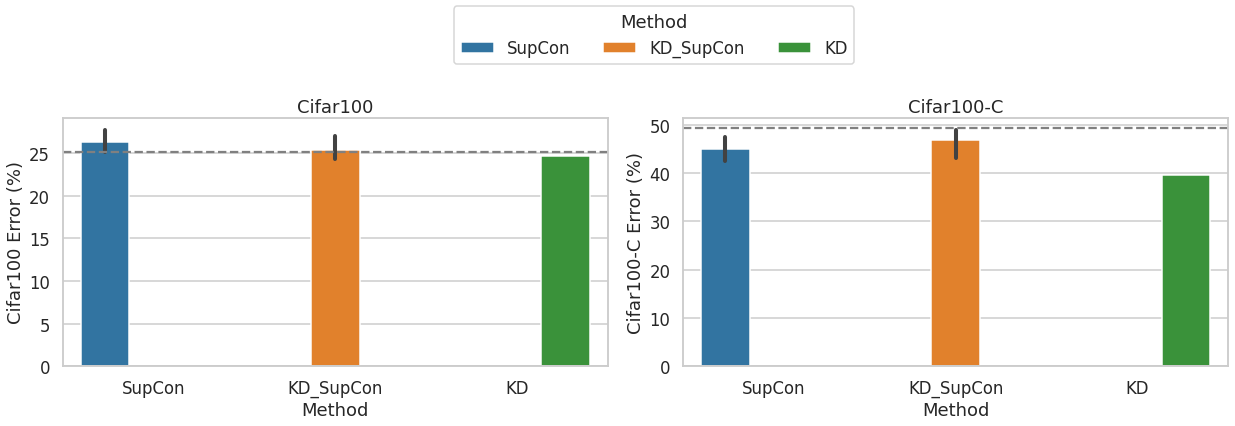

In [43]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(17.5, 5))
df_plot=df_plot.replace("KnowledgeDistill", "KD")
for ax, error in zip(axes.flatten(), ["Cifar100 Error", "Cifar100-C Error"]):
    sns.barplot(data=df_plot, x="Loss", y=error, hue="Loss", ax=ax)
    ax.set_xlabel("Method")
    ax.set_ylabel(error + " (%)")
    #if error=="Cifar100-C Error":
        #ax.set_ylim(0,51)
    ax.set_title(error.split(" ")[0])
    handles, labels = ax.get_legend_handles_labels()
    ax.legend('', frameon=False)
    ax.axhline(df_baseline.query("Network == 'resnet18'")[error].item(), color="grey", ls="dashed")
fig.legend(handles, labels, bbox_to_anchor=(0.37, 1.2), loc=2, borderaxespad=0., ncol=3, title='Method')
fig.tight_layout()
plt.savefig(f"figures/supcon_cifar_std.pdf")

In [8]:
collect(Path("/work/dlclarge2/agnihotr-shashank-pruneshift/teachers/resnet50_augmix"))

,Amda,Augmix,Cifar100 Error,Cifar100-C Error,DeepAugment,Epochs,LearningRate,Loss,Network,Path,Scaling,WeightDecay,kd_T,kd_mixture
300,False,True,27.26,37.821585,False,100,0.1,StandardLoss,resnet50,/work/dlclarge2/agnihotr-shashank-pruneshift/t...,1,0.0002,None,None
